# Colin Credit Card Fraud Detection

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, there are no original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Outline
1. Data Analysis and Data Preprocessing
2. Dealing with imbalanced data
3. Machine Learning
    a. Logistic Regression
    b. XGBoost

## 1. Data Analysis and Data Preprocessing

In [26]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold,train_test_split,cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,auc
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
#checking if the data has any null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class = 1 means that it is fraud and Class = 0 means it is not fraud

492 Of Frauds
284315 No Frauds


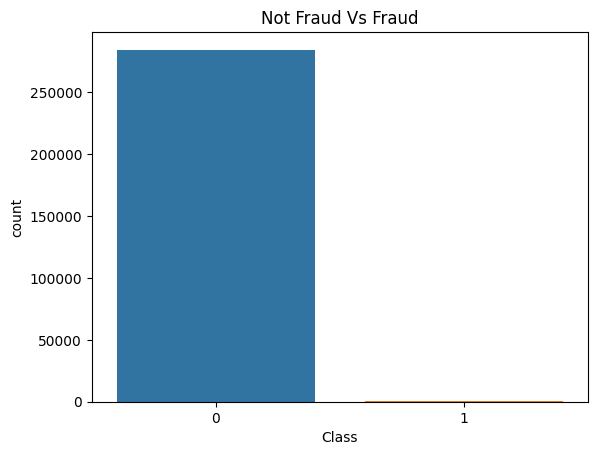

In [29]:
fraud=len(df[df["Class"]==1])
no_fraud=len(df[df["Class"]==0])
print(f"{fraud} Of Frauds")
print(f"{no_fraud} No Frauds")
sns.countplot(data=df,x="Class")
plt.title("Not Fraud Vs Fraud")
plt.show()

The data is highly imbalanced, so this will need to be fixed before predicting with machine learning.

## 2. Dealing with highly imbalanced data

In [30]:
#Highly imbalanced data
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [31]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [32]:
legit.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [33]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [34]:
legit_sample = legit.sample(n=492)

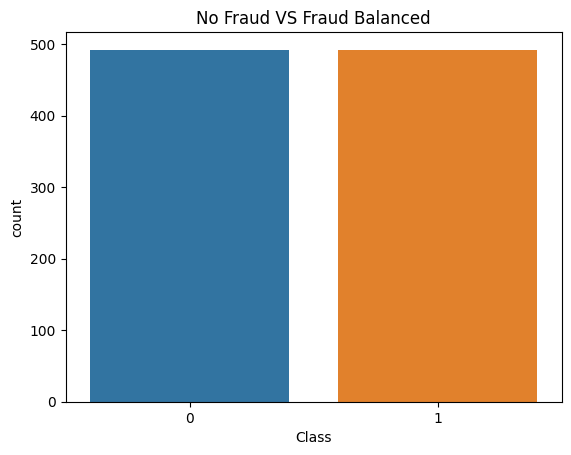

In [35]:
# Do A random Sampling
new_norm_dist_df=pd.concat([legit_sample,fraud])
sns.countplot(data=new_norm_dist_df,x="Class")
plt.title("No Fraud VS Fraud Balanced")
plt.show()

## Machine Learning

In [36]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [37]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [38]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [39]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
8236     11058.0  1.249254  0.044172  0.881644  0.317804 -0.777834 -0.817910   
75739    56229.0 -3.211223 -2.080035  1.150918  0.871203  0.251522 -0.150075   
4942      4491.0  0.840285 -0.568894  1.415464  1.326148 -0.263596  2.530293   
275178  166408.0 -0.326624  1.081232 -0.085278 -0.544375  0.105853 -1.075536   
19269    30133.0 -0.995844  0.704765  1.204062 -0.822665 -0.257125 -0.977012   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [40]:
print(Y)

8236      0
75739     0
4942      0
275178    0
19269     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (688, 30) (296, 30)


### Logistic Regression

In [43]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [44]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9433139534883721
Accuracy score on Test Data :  0.9087837837837838


### XGBoost

In [45]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train, eval_metric='aucpr')

c:\Users\Sasun\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Sasun\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
# accuracy on training data for XGBoost
y_train_pred = xgb_clf.predict(X_train)

training_data_accuracy_xg = accuracy_score(y_train_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy_xg)

# accuracy on testing data for XGBoost
y_test_pred = xgb_clf.predict(X_test)
testing_data_accuracy_xg = accuracy_score(y_test_pred, Y_test)
print('Accuracy on Testing data : ', testing_data_accuracy_xg)

Accuracy on Training data :  1.0
Accuracy on Testing data :  0.9155405405405406


c:\Users\Sasun\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
